## Problem: Cycle in circular array
LeetCode: 457. Circular Array Loop

https://leetcode.com/problems/circular-array-loop/description/

You are playing a game involving a circular array of non-zero integers nums. Each nums[i] denotes the number of indices forward/backward you must move if you are located at index i:

If nums[i] is positive, move nums[i] steps forward, and
If nums[i] is negative, move nums[i] steps backward.
Since the array is circular, you may assume that moving forward from the last element puts you on the first element, and moving backwards from the first element puts you on the last element.

A cycle in the array consists of a sequence of indices seq of length k where:

Following the movement rules above results in the repeating index sequence seq[0] -> seq[1] -> ... -> seq[k - 1] -> seq[0] -> ...
Every nums[seq[j]] is either all positive or all negative.
k > 1
Return true if there is a cycle in nums, or false otherwise.

 

Example 1:
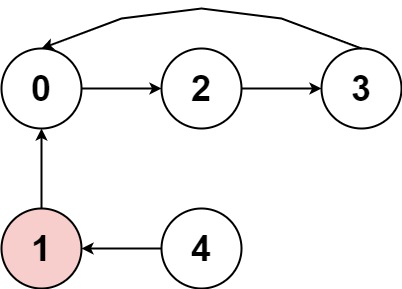

    Input: nums = [2,-1,1,2,2]
    Output: true
    Explanation: The graph shows how the indices are connected. White nodes are jumping forward, while red is jumping backward.
    We can see the cycle 0 --> 2 --> 3 --> 0 --> ..., and all of its nodes are white (jumping in the same direction).
Example 2:


    Input: nums = [-1,-2,-3,-4,-5,6]
    Output: false
    Explanation: The graph shows how the indices are connected. White nodes are jumping forward, while red is jumping backward.
    The only cycle is of size 1, so we return false.
Example 3:


    Input: nums = [1,-1,5,1,4]
    Output: true
    Explanation: The graph shows how the indices are connected. White nodes are jumping forward, while red is jumping backward.
    We can see the cycle 0 --> 1 --> 0 --> ..., and while it is of size > 1, it has a node jumping forward and a node jumping backward, so it is not a cycle.
    We can see the cycle 3 --> 4 --> 3 --> ..., and all of its nodes are white (jumping in the same direction).


Constraints:

    1 <= nums.length <= 5000
    -1000 <= nums[i] <= 1000
    nums[i] != 0

### Approach: 
Out of this problem is to find if there is cycle, with following movement rules:
1. Snippet from problem statement: movement rules above results in the repeating index sequence seq[0] -> seq[1] -> ... -> seq[k - 1] -> seq[0] -> ... Every nums[seq[j]] is either all positive or all negative.
It means, the loop should be either forward or backward. If movement is forward and backward then return false.
2. K > 1
It means, the next index should not be the same index. It should not be circular with same index.

Now, the approach, as we need to find the circular, we can go with slow and fast pointer pattern. Just keep in mind about the movement rules.

Slow movement will move one time  and fast will move two times. And check the movement rule on each movement.
If slow == fast, then return True. If rule broke then return False. Otherwise continue for next positions, till end of array.


In [1]:
def circularArrayLoop(nums):
    n = len(nums)
    if n == 1:
        return False
    for i in range(n):
        slow = i
        fast = i
        isForward = nums[i] > 0
        while True:
            slow = getNextIndex(nums, isForward, slow)
            fast = getNextIndex(nums, isForward, fast)
            if fast != -1:
                fast = getNextIndex(nums, isForward, fast)
            if slow == -1 or fast == -1 or slow == fast:
                break
        if slow != -1 and slow == fast:
            return True
    return False

def getNextIndex(nums, isForward, index):
    direction = nums[index] > 0
    if isForward != direction:
        return -1
    nextIndex = (index + nums[index]) % len(nums)
    if nextIndex <0:
        nextIndex += len(nums)
    if nextIndex == index :
        return -1
    return nextIndex

In [2]:
nums = [2,-1,1,2,2]
circularArrayLoop(nums)

True

In [3]:
nums = [1,-1,5,1,4]
circularArrayLoop(nums)

True

In [4]:
nums = [-1,-2,-3,-4,-5,6]
circularArrayLoop(nums)

False